In [3]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

/tmp/ipykernel_8770/986550325.py:20: RuntimeWarning: divide by zero encountered in divide
  v_phi = c * (1 - alpha_1 / r_v)
/tmp/ipykernel_8770/986550325.py:29: RuntimeWarning: divide by zero encountered in log
  plt.plot(f, 20*np.log(Z_e/max(Z_e)), label="theorie")


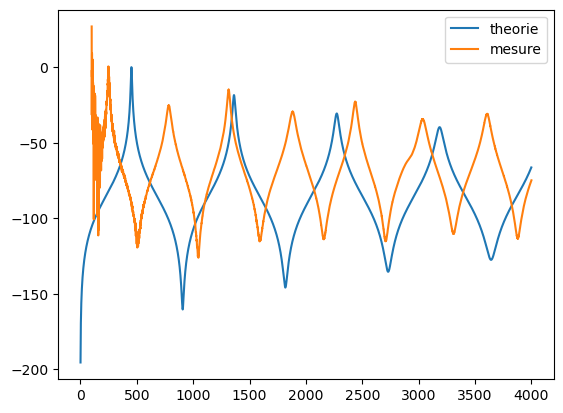

peaks theorie [ 452 1362 2273 3186]


In [27]:
f = np.arange(0, 4000)
#zegrev p.7
l = 183e-3
D = 19e-3
R = D/2
T_celcius = 21.7

T_kelvin = T_celcius + 273.15
rho_0 = 1.292 * (273.15/T_kelvin)
S = np.pi * R**2
c = 20.05 * np.sqrt(T_kelvin)

Z_c = rho_0 * c / S

alpha_1 = 1.044
mu = 8.8848e-15 * T_kelvin**3 - 3.2398e-11 * T_kelvin**2 + 6.2657e-8 * T_kelvin + 2.3543e-6
l_v = mu / (rho_0 * c)
k_v = np.sqrt(-1j * 2*np.pi * f / (c * l_v))
r_v = abs(k_v * R)
v_phi = c * (1 - alpha_1 / r_v)
k = 2 * np.pi * f / v_phi
delta_l = 0.6 * R # 0.81 ou 0.83 pour non bafflé
Z_r = Z_c * (1j * k * delta_l + 1/4*(k*R)**2)
# Z_r = 0

gamma = 1j * 2*np.pi*f/c + (1+1j) * 3e-5 * np.sqrt(f) / R
Z_e = abs(Z_c * np.tanh(gamma * l + np.arctanh(Z_r / Z_c)))

plt.plot(f, 20*np.log(Z_e/max(Z_e)), label="theorie")
def load_capteurz(filename):
    s = open(filename).read().splitlines()
    freq = []
    data = []
    for l in s:
        f, real, imag = [float(i) for i in l.replace(",", ".").split()]
        freq.append(f)
        data.append(real+imag*1j)


    return np.array(freq), np.array(data)

freq, imp = load_capteurz("cylindre+bec4k/Impedance.txt")
plt.plot(freq, 20*np.log(abs(imp/max(imp))), label="mesure")
plt.legend()
plt.show()
peaks_theo, _ = scipy.signal.find_peaks(abs(Z_e))
print("peaks theorie", f[peaks_theo])

# peaks_mesure, _ = scipy.signal.find_peaks(abs(imp))
# print("peaks mesure", freq[peaks_mesure])


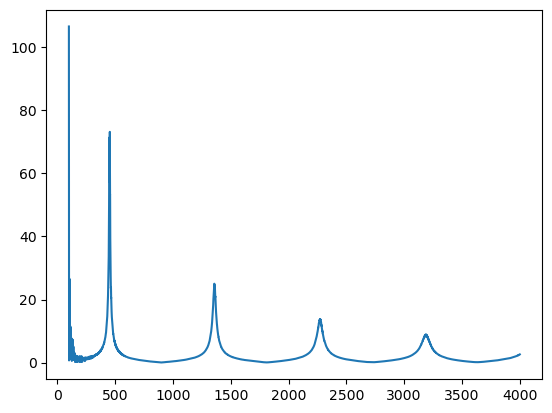